In [25]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [26]:
# warning zone and danger zone
d = 0.5
q = 1
warning = False
collision = False

In [27]:
# current and target loations
curr_1 = [0, 0]
tar_1 = [10, 10]
curr_2 = [0, 10]
tar_2 = [10, 0]

In [28]:
def arrived(curr, tar):
    arrived = False
    if curr[0] == tar[0] and curr[1] == tar[1]:
        arrived = True
    return arrived

In [29]:
def get_warning():
    if arrived(curr_1, tar_1) or arrived(curr_2, tar_2):
        return False
    if np.abs(curr_1[0] - curr_2[0]) <=q and np.abs(curr_1[1] - curr_2[1]) <=q:
        print("warning")

        return True

In [30]:
def move(curr, direction):
    x = curr[0] + direction[0]
    y = curr[1] + direction[1]
    return [x, y]

In [31]:
def get_dir():
    direction_1 = []
    direction_2 = []
    warning = get_warning()

    # for the first aircraft
    if tar_1[0] - curr_1[0] > 0: 
        direction_1 = [1, 0] # positive x
    if tar_1[0] - curr_1[0] < 0: 
        direction_1 = [-1, 0] # negative x
    else:
        if tar_1[1] - curr_1[1] > 0: 
            direction_1 = [0, 1] # positive y
        if tar_1[1] - curr_1[1] < 0: 
            direction_1 = [0, -1] # negative y
    
    # for the second aircraft       
    if tar_2[0] - curr_2[0] > 0: 
        direction_2 = [1, 0] # positive x
    if tar_2[0] - curr_2[0] < 0: 
        direction_2 = [-1, 0] # negative x
    else:
        if tar_2[1] - curr_2[1] > 0: 
            direction_2 = [0, 1] # positive y
        if tar_2[1] - curr_2[1] < 0: 
            direction_2 = [0, -1] # negative y
            
    if warning or move(curr_1, direction_1) == move(curr_2, direction_2):
        # check if they are going to collide next round
        # if no, it's fine
        # but if yes, change direction of the second aircraft by 90 degree
        
        # if second aircraft was going in y direction, now go x direction
        if direction_2[1] != 0:
            if tar_2[0] - curr_2[0] > 0: 
                direction_2 = [1, 0] # positive x
            if tar_2[0] - curr_2[0] < 0: 
                direction_2 = [-1, 0] # negative x
        # if second aircraft was going in x direction, now go y direction
        elif direction_2[0] != 0:
            if tar_2[1] - curr_2[1] > 0: 
                direction_2 = [0, 1] # positive y
            if tar_2[1] - curr_2[1] < 0: 
                direction_2 = [0, -1] # negative y
    
    return direction_1, direction_2

In [32]:
def controller():
    global curr_1, curr_2, collision
    direction_1, direction_2 = get_dir()
    curr_1 = move(curr_1, direction_1)
    curr_2 = move(curr_2, direction_2)
    
    # check for safety
    if np.abs(curr_1[0] - curr_2[0]) <=d and np.abs(curr_1[1] - curr_2[1]) <=d:
        collision = True
        print("collision")

In [33]:
states_1 = []
states_2 = []
t = 0
while not arrived(curr_1, tar_1) and not arrived(curr_2, tar_2):
    controller()
    if collision:
        break
    states_1.append(curr_1)
    states_2.append(curr_2)
    t += 1

warning


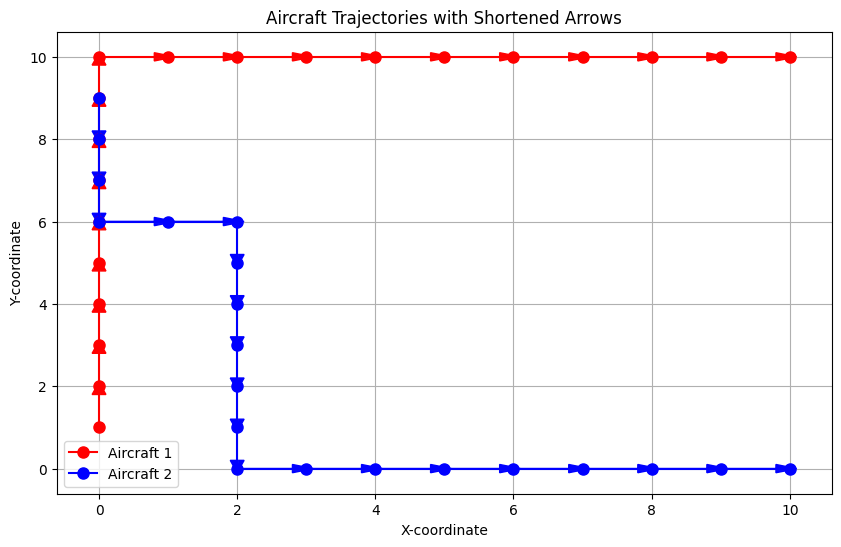

In [34]:
# to plot the path

# Extract x and y coordinates for each list
x1, y1 = zip(*states_1)
x2, y2 = zip(*states_2)

# Factor for shortening the arrows
shorten_factor = 0.2

# Plotting
plt.figure(figsize=(10, 6))

# Plot states_1 in red with shortened arrows
plt.plot(x1, y1, 'o-', color='red', markersize=8, label='Aircraft 1')
for i in range(len(x1) - 1):
    dx = (x1[i+1] - x1[i]) * (1 - shorten_factor)
    dy = (y1[i+1] - y1[i]) * (1 - shorten_factor)
    plt.arrow(x1[i], y1[i], dx, dy, color='red', head_width=0.2)

# Plot states_2 in blue with shortened arrows
plt.plot(x2, y2, 'o-', color='blue', markersize=8, label='Aircraft 2')
for i in range(len(x2) - 1):
    dx = (x2[i+1] - x2[i]) * (1 - shorten_factor)
    dy = (y2[i+1] - y2[i]) * (1 - shorten_factor)
    plt.arrow(x2[i], y2[i], dx, dy, color='blue', head_width=0.2)

# Add labels, title, legend, and grid
plt.xlabel("X-coordinate")
plt.ylabel("Y-coordinate")
plt.title("Aircraft Trajectories with Shortened Arrows")
plt.legend()
plt.grid(True)
plt.show()


MovieWriter imagemagick unavailable; using Pillow instead.


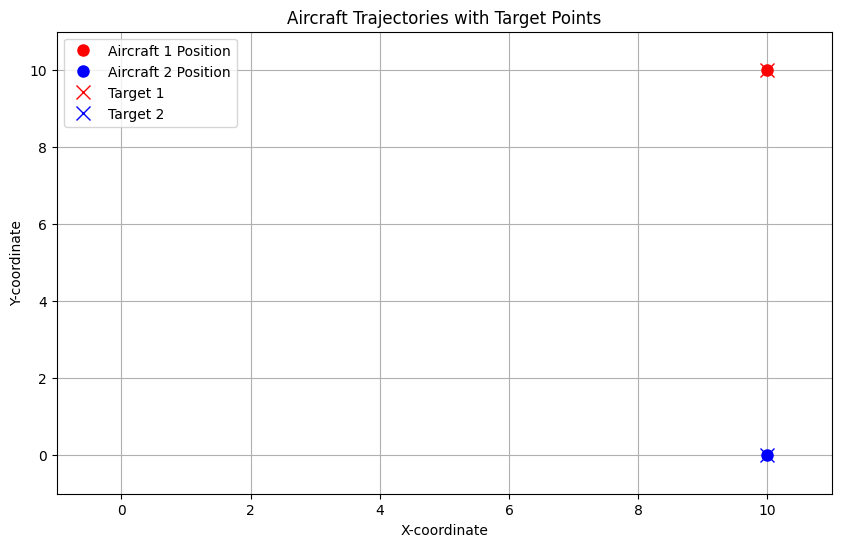

In [35]:
# to generate gif

# Extract x and y coordinates for each list
x1, y1 = zip(*states_1)
x2, y2 = zip(*states_2)

# Create figure for animation
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_xlim(min(x1 + x2 + (tar_1[0], tar_2[0])) - 1, max(x1 + x2 + (tar_1[0], tar_2[0])) + 1)
ax.set_ylim(min(y1 + y2 + (tar_1[1], tar_2[1])) - 1, max(y1 + y2 + (tar_1[1], tar_2[1])) + 1)
ax.set_xlabel("X-coordinate")
ax.set_ylabel("Y-coordinate")
ax.set_title("Aircraft Trajectories with Target Points")
ax.grid(True)

# Plot initial point placeholders and target points
point1, = ax.plot([], [], 'o', color='red', markersize=8, label='Aircraft 1 Position')
point2, = ax.plot([], [], 'o', color='blue', markersize=8, label='Aircraft 2 Position')
target1, = ax.plot(tar_1[0], tar_1[1], 'x', color='red', markersize=10, label='Target 1')
target2, = ax.plot(tar_2[0], tar_2[1], 'x', color='blue', markersize=10, label='Target 2')

# Initialize the plot
def init():
    point1.set_data([], [])
    point2.set_data([], [])
    return point1, point2, target1, target2

# Animation function to show one point at each frame and the target points
def animate(i):
    point1.set_data(x1[i], y1[i])
    point2.set_data(x2[i], y2[i])
    return point1, point2, target1, target2

plt.legend()
# Create the animation
ani = animation.FuncAnimation(fig, animate, frames=len(states_1), init_func=init, blit=True, repeat=False)
ani.save('aircraft_trajectory_with_targets.gif', writer='imagemagick', fps=1)

# Display the animation directly
plt.show()
